# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

- Fashion MNIST 는 10 개 카테고리에 70,000 개의 회색조 이미지가 포함 된 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터 세트.  

- 이미지는 다음과 같이 저해상도 (28 x 28 픽셀)의 개별 의류 품목을 보여준다.  

- 여기서 60,000 개의 이미지를 사용하여 네트워크를 훈련시키고 10,000 개의 이미지를 사용하여 네트워크가 이미지를 분류하는 방법을 얼마나 정확하게 학습했는지 평가   

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table>

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

### Data Load

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

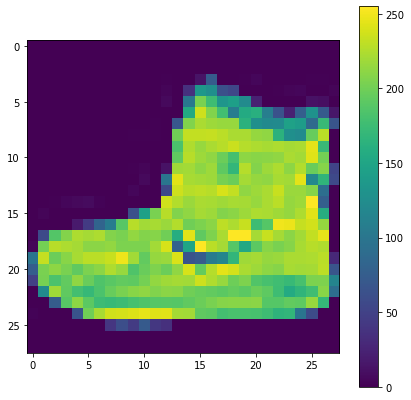

In [4]:
plt.imshow(train_images[0])
plt.colorbar()

### Feature Scaling

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

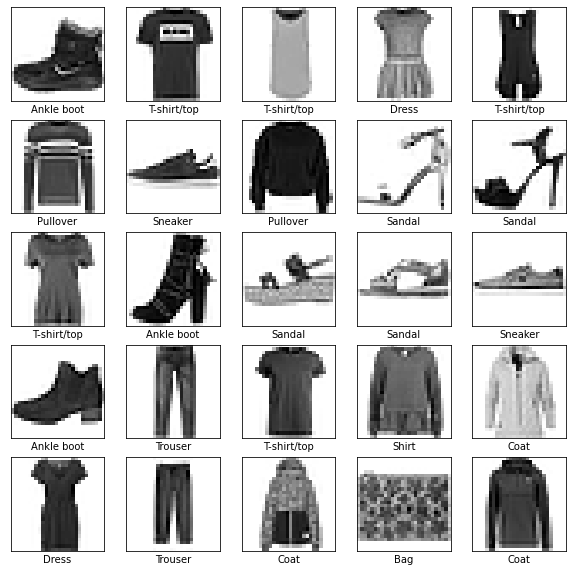

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

### 2차원 Data를 1차원으로 Flatten

In [19]:
X_train = train_images.reshape(-1, 784).astype("float32")
X_test = test_images.reshape(-1, 784).astype("float32")

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

### One-Hot Encoding

In [15]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test  = tf.keras.utils.to_categorical(test_labels)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Model Build

In [16]:
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
375/375 [==============================] - 2s 5ms/step - loss: 0.9979 - accuracy: 0.6180 - val_loss: 0.6158 - val_accuracy: 0.7636
Epoch 2/40
375/375 [==============================] - 2s 4ms/step - loss: 0.5905 - accuracy: 0.7825 - val_loss: 0.5028 - val_accuracy: 0.8145
Epoch 3/40
375/375 [==============================] - 2s 5ms/step - loss: 0.5090 - accuracy: 0.8150 - val_loss: 0.4728 - val_accuracy: 0.8213
Epoch 4/40
375/375 [==============================] - 2s 4ms/step - loss: 0.4660 - accuracy: 0.8313 - val_loss: 0.4295 - val_accuracy: 0.8389
Epoch 5/40
375/375 [==============================] - 2s 4ms/step - loss: 0.4353 - accuracy: 0.8422 - val_loss: 0.4055 - val_accuracy: 0.8502
Epoch 6/40
375/375 [==============================] - 2s 4ms/step - loss: 0.4123 - accuracy: 0.8494 - val_loss: 0.3893 - val_accuracy: 0.8580
Epoch 7/40
375/375 [==============================] - 2s 5ms/step - loss: 0.3988 - accuracy: 0.8544 - val_loss: 0.3811 - val_accuracy: 0.8598
Epoch 

### model 평가

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)

In [22]:
print(model.metrics_names)
print("Test loss :", score[0])          # evaluation of loss function
print("Test accuracy :", score[1])

['loss', 'accuracy']
Test loss : 0.3247559070587158
Test accuracy : 0.8870000243186951


In [23]:
y_predict = model.predict(X_test).argmax(axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [24]:
correct_indices = np.nonzero(y_predict == y_true)[0]
incorrect_indices = np.nonzero(y_predict != y_true)[0]
print(correct_indices.shape)
print(incorrect_indices.shape)

(8870,)
(1130,)


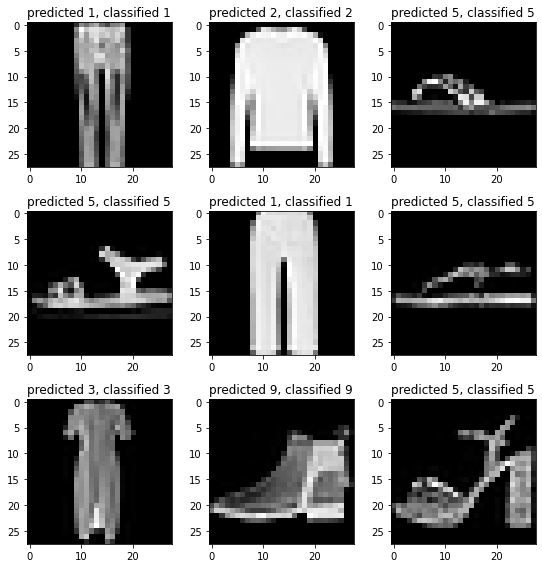

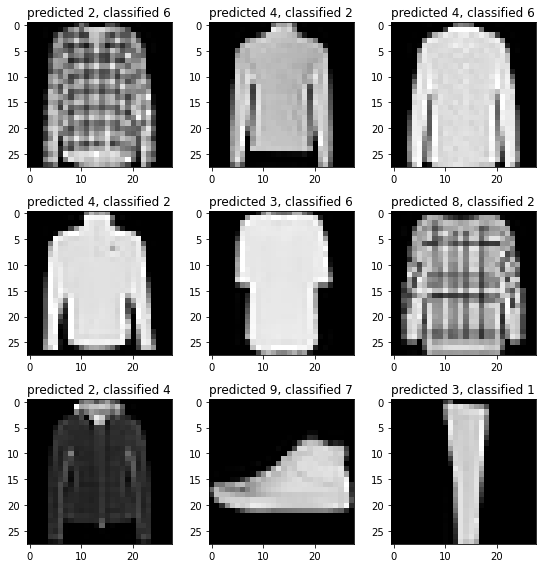

In [25]:
plt.figure(figsize=(8, 8))
for i, correct in enumerate(np.random.choice(correct_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[correct], y_true[correct]))
    plt.tight_layout()
    
plt.figure(figsize=(8, 8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[incorrect], y_true[incorrect]))
    plt.tight_layout()

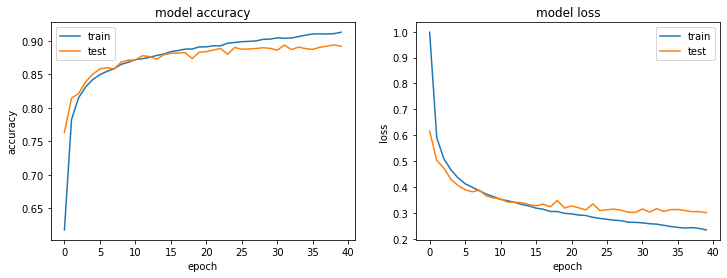

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);